In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ipypublish import nb_setup
import os
from os.path import join

# https://stackoverflow.com/a/39566040/11552622
rcparams = {
    'axes.titlesize':13,
    'axes.labelsize':9,
    'xtick.labelsize':8,
    'ytick.labelsize':8
}
plt = nb_setup.setup_matplotlib(output=('pdf','svg'), rcparams=rcparams)
pd = nb_setup.setup_pandas(escape_latex=False)
sns.set(style='whitegrid')

# Introduction

## Aim

Visualize and analyze sensitivity analysis data.

# Data check

## Distribution of sensitivity analysis variables

For each value of $\epsilon$, we generate four sets of simulations - one for each variable among $E_{max,lv}$, $E_{max,lv,0}$, $G_{E_{max,lv}}$, $k_{E,lv}$. In each set:

* 3 variables $P_i$ are set to the constant value $(P_{i,max} + P_{i,min})/2$, $i \in \{0,1,2,3\}$
* the last variable $P_j$ is sampled for each simulation according to the formula:

$$\frac{(P_{i,max} + P_{i,min})}{2} (1+\epsilon x)$$

* with $x$ a sample of the random variable $X \sim \mathcal{N}(0, 1)$, $i \in \{0,1,2,3\}$

In [2]:
path = '/media/maousi/Raw/sensitivity'
params = []
# For each value of epsilon
for folder in os.listdir(path):
    # Extract epsilon value
    epsilon = folder.split('_')[-1]
    # For each 0D model parameter
    dfepsilon = []
    for subfolder in os.listdir(join(path, folder)):
        # Extract parameter name
        param = subfolder[3:]
        # Read parameters.txt file
        pathtmp = join(path, folder, subfolder)
        dftmp = pd.read_csv(join(pathtmp, 'parameters.txt'))
        # Extract the column of the varying parameter
        dfepsilon.append(dftmp[param])
    
    # Merge the parameter values for a given epsilon
    dfepsilon = pd.DataFrame(dfepsilon).transpose()
    # Spefiy the value of epsilon
    dfepsilon['epsilon'] = epsilon
    params.append(dfepsilon)

# Merge everything
params = pd.concat(params, ignore_index=True)

In [3]:
params.describe()

,Param_LeftVentricle_Emax0,Param_LeftVentricle_EmaxRef0,Param_LeftVentricle_AGain_Emax,Param_LeftVentricle_kE
count,500.000000,500.000000,500.000000,500.000000
mean,1.573399,1.300423,0.334822,0.012414
std,0.156269,0.141047,0.035574,0.001329
min,0.736748,0.567951,0.134512,0.004987
25%,1.527646,1.265347,0.328371,0.012085
50%,1.570017,1.297673,0.336802,0.012475
75%,1.616030,1.333979,0.344464,0.012756
max,2.429057,1.862549,0.516382,0.018673


In [4]:
param_dic = dict(zip(params, ['$E_{max,lv}$', '$E_{max,lv,0}$', '$G_{E_{max,lv}}$', '$k_{E,lv}$']))
param_dic

{'Param_LeftVentricle_Emax0': '$E_{max,lv}$',
 'Param_LeftVentricle_EmaxRef0': '$E_{max,lv,0}$',
 'Param_LeftVentricle_AGain_Emax': '$G_{E_{max,lv}}$',
 'Param_LeftVentricle_kE': '$k_{E,lv}$'}

In [14]:
summary = params.rename(columns=param_dic)
summary = summary.groupby('epsilon').describe().transpose()
summary = summary.loc[ (slice(None), ('min', '50%', 'max', 'std')), : ]
summary = summary.rename(index={'50%':'mean'})
summary

epsilon                    0.01      0.02      0.05       0.1       0.2
$E_{max,lv}$     std   0.015230  0.036015  0.075635  0.137877  0.310689
                 min   1.540203  1.472391  1.411145  1.260899  0.736748
                 mean  1.574691  1.562557  1.575721  1.550661  1.573843
                 max   1.615660  1.667325  1.768907  1.945284  2.429057
$E_{max,lv,0}$   std   0.011340  0.026707  0.074098  0.146853  0.268665
                 min   1.258356  1.222782  1.094260  0.936026  0.567951
                 mean  1.295663  1.299283  1.303397  1.280631  1.313046
                 max   1.325146  1.371594  1.445794  1.655108  1.862549
$G_{E_{max,lv}}$ std   0.003236  0.006884  0.017110  0.030818  0.070655
                 min   0.330577  0.317883  0.302946  0.269044  0.134512
                 mean  0.337227  0.336783  0.336599  0.337981  0.328143
                 max   0.346135  0.355759  0.380295  0.403388  0.516382
$k_{E,lv}$       std   0.000127  0.000231  0.000664  0.001349  0.002556
                 min   0.012219  0.012003  0.010928  0.008449  0.004987
                 mean  0.012517  0.012487  0.012387  0.012171  0.012533
                 max   0.012772  0.013122  0.014616  0.015227  0.018673

In [6]:
names = [p for p in params.columns if p != 'epsilon']
names = list(zip(names, 
                 ['$E_{max,lv}$', '$E_{max,lv,0}$', '$G_{E_{max,lv}}$', '$k_{E,lv}$'], 
                 [(0.2, 2.95), (0.2, 2.392), (0.2, 0.475), (0.011, 0.014)]
                 ))
names

[('Param_LeftVentricle_Emax0', '$E_{max,lv}$', (0.2, 2.95)),
 ('Param_LeftVentricle_EmaxRef0', '$E_{max,lv,0}$', (0.2, 2.392)),
 ('Param_LeftVentricle_AGain_Emax', '$G_{E_{max,lv}}$', (0.2, 0.475)),
 ('Param_LeftVentricle_kE', '$k_{E,lv}$', (0.011, 0.014))]

In [7]:
epsilons = params.epsilon.unique()
epsilons

array(['0.01', '0.02', '0.05', '0.1', '0.2'], dtype=object)

In [8]:
#summary = 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

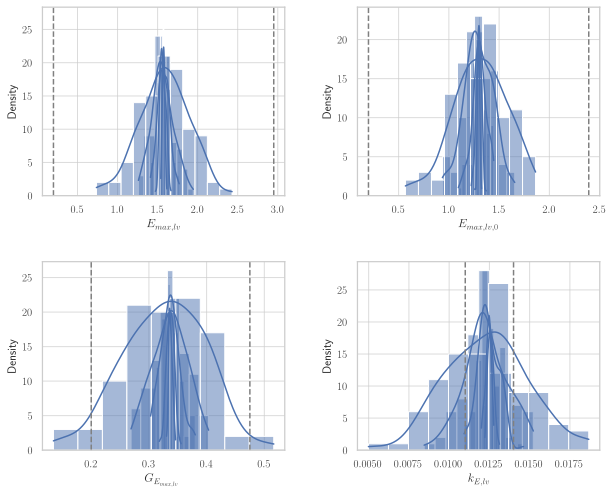

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for (p, platex, (min_, max_)), ax in zip(names, axes):
    for epsilon in epsilons:
        sns.histplot(params.loc[params.epsilon == epsilon, p], 
                     ax=ax, kde=True, 
                     label=r'$\epsilon = ' + str(epsilon) + '$')
    ax.set_xlabel(platex)
    ax.set_ylabel('Density')
    ax.grid(alpha=.7)
    ax.axvline(min_, ls='--', color='grey')
    ax.axvline(max_, ls='--', color='grey')
        
plt.subplots_adjust(hspace=.35, wspace=.3)
plt.savefig('figs/sensitivity_var_distrib.eps')

Distribution of the variables that vary (i.e. not fixed) during the sensitivity analysis. Each curve estimates the gaussian kernel distribution of 100 simulation samples generated by fixing three parameters while the fourth one varies. Each subplots shows the distribution of the non-fixed variable for different values of epsilon.

# Summary tables

**MANUALLY IMPORT THE LATEX FILES HERE, AFTER USING NBPUBLISH**. 